In [7]:
# Importing all needed libraries and sublibraries
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Importing input (x) and output (y) data, and asign these to df1 and df2

df1 = pd.read_csv('C:/Users/parit/Internship/Data/Dataset/StatsVideosXALL.csv')

df2 = pd.read_csv('C:/Users/parit/Internship/Data/Dataset/StatsVideosYALL.csv')

In [4]:
# Spliting the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [5]:
# Scaling both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

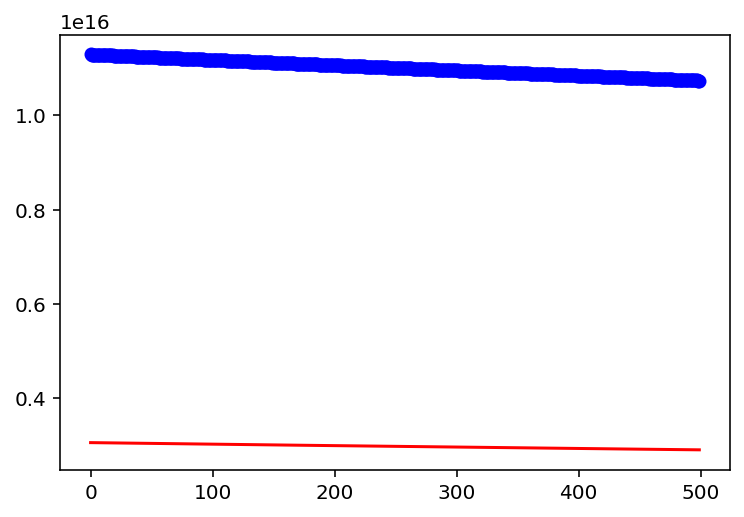

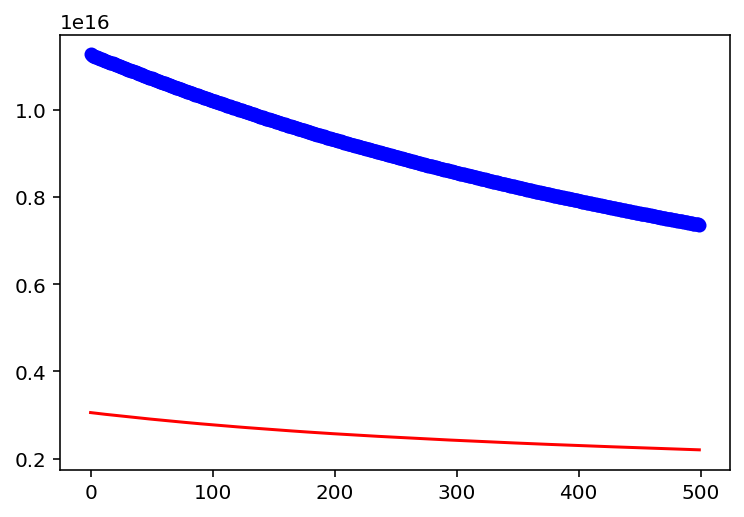

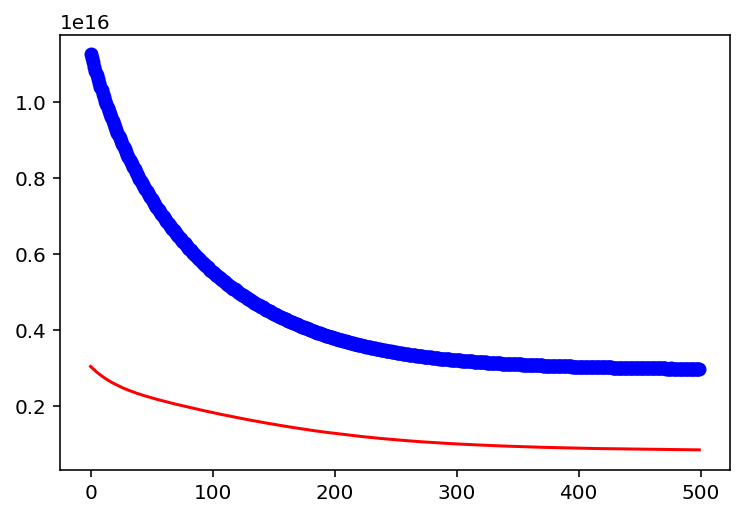

In [7]:
# Ploting the results of a learning rate of 100, 1000, and 10000 respectively, with all other parameters constant

LR = [100,1000,10000]

for i in LR:
    #Defines linear regression model and its structure
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    
    #Compiles model
    model.compile(optimizer=Adam(lr=i), loss='mean_squared_error')
    
    #Fits model
    history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')

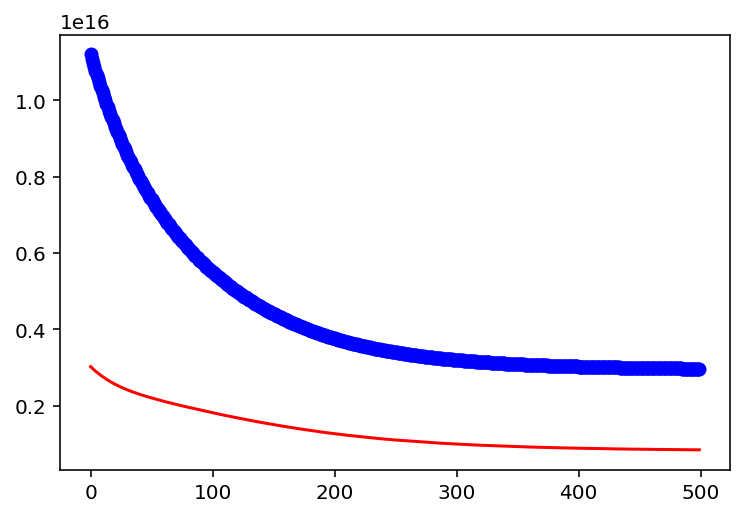

In [8]:
# Runs and plots the performance of a model with the same parameters from before (and a learning rate of 10000), 
# but now with activation function (ReLU)

model = Sequential()
model.add(Dense(1, input_shape=(3,), activation = 'relu'))
model.compile(optimizer=Adam(lr=10000), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.1,verbose = 0)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [9]:
# Runs model (the one with the activation function, perform the same) 
# with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r^2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.770
The R2 score on the Test set is:	0.836


<Figure size 432x288 with 0 Axes>

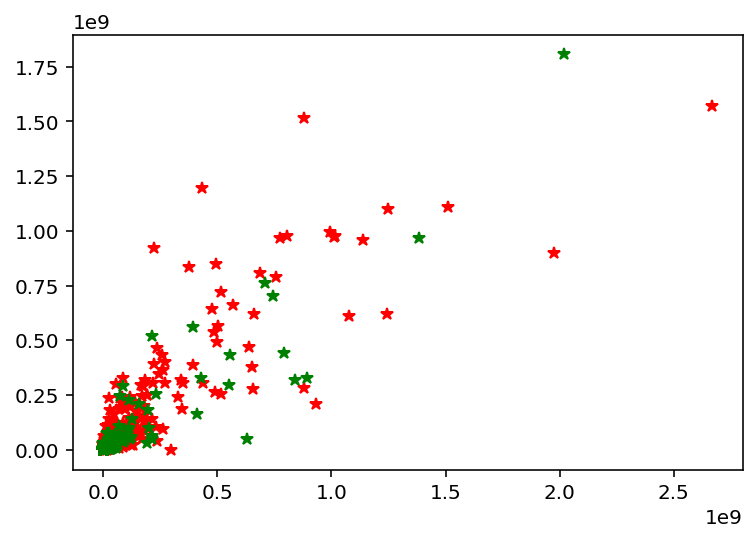

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()